#Intent Detection

In [1]:
from google.colab import files

uploaded = files.upload()


Saving sofmattress_train.csv to sofmattress_train.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

import io

Data Pre-Processing

In [3]:
df = pd.read_csv('/content/sofmattress_train.csv')
print(df)

                                           sentence   label
0                      You guys provide EMI option?     EMI
1    Do you offer Zero Percent EMI payment options?     EMI
2                                           0% EMI.     EMI
3                                               EMI     EMI
4                             I want in installment     EMI
..                                              ...     ...
323              May I please know about the offers  OFFERS
324                                Available offers  OFFERS
325                              Is offer available  OFFERS
326                      Want to know the discount   OFFERS
327                 Tell me about the latest offers  OFFERS

[328 rows x 2 columns]


In [4]:
print(df.isnull().sum())

sentence    0
label       0
dtype: int64


#Number of intent labels with count


In [5]:
counts = df['label'].value_counts()

print(counts, '\n')
print(len(counts))

label
DISTRIBUTORS             34
EMI                      25
MATTRESS_COST            22
LEAD_GEN                 21
PRODUCT_VARIANTS         21
ORDER_STATUS             21
WHAT_SIZE_TO_ORDER       20
100_NIGHT_TRIAL_OFFER    18
ORTHO_FEATURES           17
RETURN_EXCHANGE          14
COD                      12
COMPARISON               11
ERGO_FEATURES            11
ABOUT_SOF_MATTRESS       11
DELAY_IN_DELIVERY        11
CANCEL_ORDER             10
PILLOWS                  10
CHECK_PINCODE            10
WARRANTY                 10
OFFERS                   10
SIZE_CUSTOMIZATION        9
Name: count, dtype: int64 

21


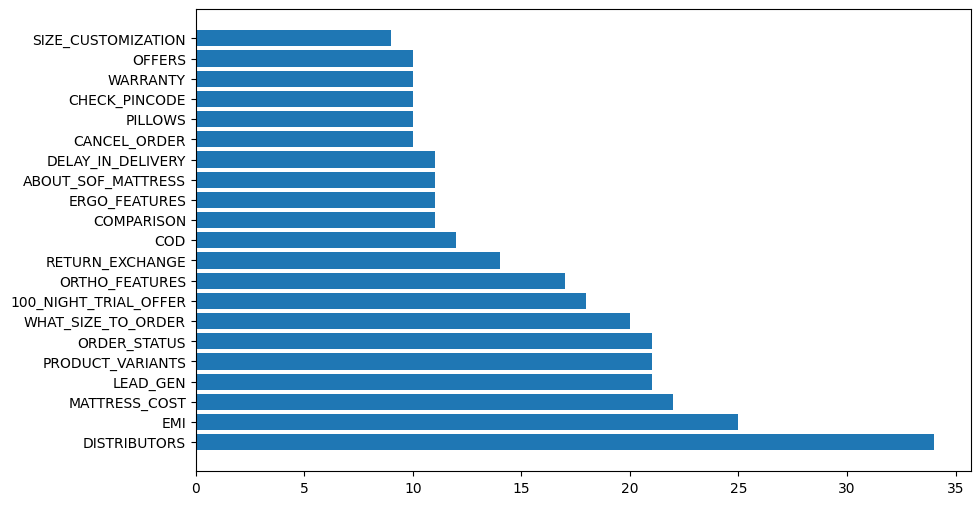

In [6]:
plt.figure(figsize=(10, 6))
plt.barh(counts.index, counts.values)
plt.show()

# Data Preprocessing

In [7]:
import re

def clean_text(sen):                                       #sen = sentences/ Clause/ Phrases
  sen = sen.lower()
  sen = re.sub(r'[^a-zA-Z0-9\s]', '', sen)

  return sen

df['cleaned_sentence'] = df['sentence'].apply(clean_text)

print(df)

                                           sentence   label  \
0                      You guys provide EMI option?     EMI   
1    Do you offer Zero Percent EMI payment options?     EMI   
2                                           0% EMI.     EMI   
3                                               EMI     EMI   
4                             I want in installment     EMI   
..                                              ...     ...   
323              May I please know about the offers  OFFERS   
324                                Available offers  OFFERS   
325                              Is offer available  OFFERS   
326                      Want to know the discount   OFFERS   
327                 Tell me about the latest offers  OFFERS   

                                  cleaned_sentence  
0                      you guys provide emi option  
1    do you offer zero percent emi payment options  
2                                            0 emi  
3                              

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['cleaned_sentence'], df['label'], test_size = 0.2, random_state = 42, shuffle = True, stratify=df['label'])

In [9]:
print(x_train)
print(x_test)

135                                     please call me
174                             where is your showroom
269                                  where is my order
170                     distributorsretailersshowrooms
146                                connect to an agent
                            ...                       
106            how can i order a custom sized mattress
241    how is sof different from other mattress brands
278                                 what is the status
156               is delivery possible on this pincode
151                                        call me now
Name: cleaned_sentence, Length: 262, dtype: object
1      do you offer zero percent emi payment options
62                           what is responsive foam
96                            i want to check offers
83                 need to know the warranty details
147                                     get in touch
                           ...                      
318                       

# Feature Extraction and Representation usinf TF- IDF Vectorization

In [10]:
from  sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()           #if req max = 5000
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

print(x_train_tfidf)
print(x_test_tfidf)

  (0, 174)	0.6185729447364571
  (0, 34)	0.5986261728333787
  (0, 132)	0.5089343938455427
  (1, 246)	0.5304664695888712
  (1, 112)	0.3347661770659814
  (1, 256)	0.5506981620336803
  (1, 206)	0.5506981620336803
  (2, 246)	0.6492832684688082
  (2, 112)	0.40974894753794294
  (2, 140)	0.4609938454943997
  (2, 159)	0.44499630525915046
  (3, 76)	1.0
  (4, 51)	0.5919993172389655
  (4, 227)	0.322720132061564
  (4, 14)	0.5222013619049483
  (4, 9)	0.5222013619049483
  (5, 129)	0.5469881075597169
  (5, 178)	0.8371403766324018
  (6, 36)	0.3511368709584936
  (6, 255)	0.3511368709584936
  (6, 101)	0.4945560498998257
  (6, 251)	0.5134181391588276
  (6, 224)	0.3091894501760453
  (6, 208)	0.38681236730094204
  (7, 246)	0.39057975139464757
  :	:
  (257, 36)	0.33561018734789255
  (257, 103)	0.3757027635251817
  (257, 55)	0.4726876106967809
  (257, 209)	0.5813188985485143
  (258, 112)	0.23475331182880432
  (258, 129)	0.22244108174310903
  (258, 103)	0.29566387387328674
  (258, 71)	0.40353862472053303
  (25

# As the data is distributed in sparse region, the heatmap is not generated properly

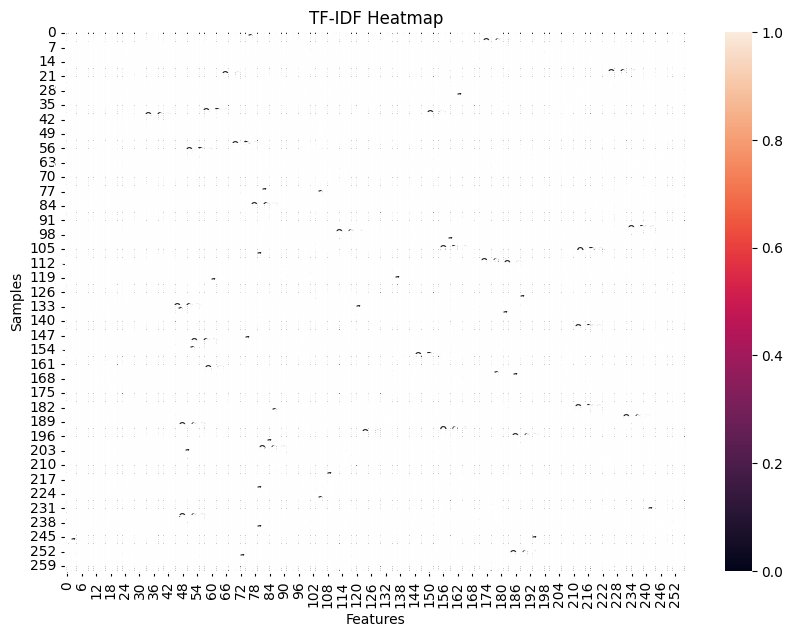

In [16]:
plt.figure(figsize=(10, 7))
sns.heatmap(x_train_tfidf.toarray(), annot=True)        #converting an compressed data to array

plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('TF-IDF Heatmap')
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)

model.fit(x_train_tfidf, y_train)

y_pred = model.predict(x_test_tfidf)

print(y_pred)

['EMI' 'PRODUCT_VARIANTS' 'OFFERS' 'WARRANTY' 'LEAD_GEN'
 'PRODUCT_VARIANTS' 'LEAD_GEN' '100_NIGHT_TRIAL_OFFER'
 'SIZE_CUSTOMIZATION' 'CANCEL_ORDER' 'EMI' 'ABOUT_SOF_MATTRESS'
 '100_NIGHT_TRIAL_OFFER' 'SIZE_CUSTOMIZATION' 'LEAD_GEN' 'DISTRIBUTORS'
 'ORTHO_FEATURES' 'MATTRESS_COST' 'COD' 'DISTRIBUTORS' 'PRODUCT_VARIANTS'
 'COD' '100_NIGHT_TRIAL_OFFER' 'MATTRESS_COST' 'LEAD_GEN' 'ORDER_STATUS'
 'EMI' 'CHECK_PINCODE' 'MATTRESS_COST' 'PRODUCT_VARIANTS' 'ORDER_STATUS'
 'PILLOWS' 'OFFERS' 'WHAT_SIZE_TO_ORDER' 'DISTRIBUTORS' 'RETURN_EXCHANGE'
 'ORTHO_FEATURES' 'SIZE_CUSTOMIZATION' 'ABOUT_SOF_MATTRESS'
 'DELAY_IN_DELIVERY' 'RETURN_EXCHANGE' 'LEAD_GEN' 'COMPARISON' 'EMI'
 'CANCEL_ORDER' 'CHECK_PINCODE' 'PILLOWS' 'PRODUCT_VARIANTS' 'WARRANTY'
 'COD' 'MATTRESS_COST' 'WHAT_SIZE_TO_ORDER' 'DISTRIBUTORS'
 'WHAT_SIZE_TO_ORDER' 'DISTRIBUTORS' 'WHAT_SIZE_TO_ORDER' 'DISTRIBUTORS'
 'DISTRIBUTORS' 'ABOUT_SOF_MATTRESS' 'DISTRIBUTORS' 'ABOUT_SOF_MATTRESS'
 'OFFERS' 'MATTRESS_COST' 'LEAD_GEN' 'DISTRIBUTORS' 

In [13]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .2f}')

f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f'F1 Score: {f1: .2f}')

precision = precision_score(y_test, y_pred, average = 'weighted')
print(f'Precision: {precision: .2f}')

recall = recall_score(y_test, y_pred, average = 'weighted')
print(f'Recall: {recall: .2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{cm}')

Accuracy:  0.82
F1 Score:  0.81
Precision:  0.84
Recall:  0.82
Classification Report:
                       precision    recall  f1-score   support

100_NIGHT_TRIAL_OFFER       1.00      0.75      0.86         4
   ABOUT_SOF_MATTRESS       0.50      1.00      0.67         2
         CANCEL_ORDER       1.00      1.00      1.00         2
        CHECK_PINCODE       1.00      1.00      1.00         2
                  COD       0.67      1.00      0.80         2
           COMPARISON       1.00      1.00      1.00         2
    DELAY_IN_DELIVERY       1.00      0.50      0.67         2
         DISTRIBUTORS       0.78      1.00      0.88         7
                  EMI       1.00      0.80      0.89         5
        ERGO_FEATURES       0.00      0.00      0.00         2
             LEAD_GEN       0.67      1.00      0.80         4
        MATTRESS_COST       1.00      1.00      1.00         5
               OFFERS       0.67      1.00      0.80         2
         ORDER_STATUS       1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

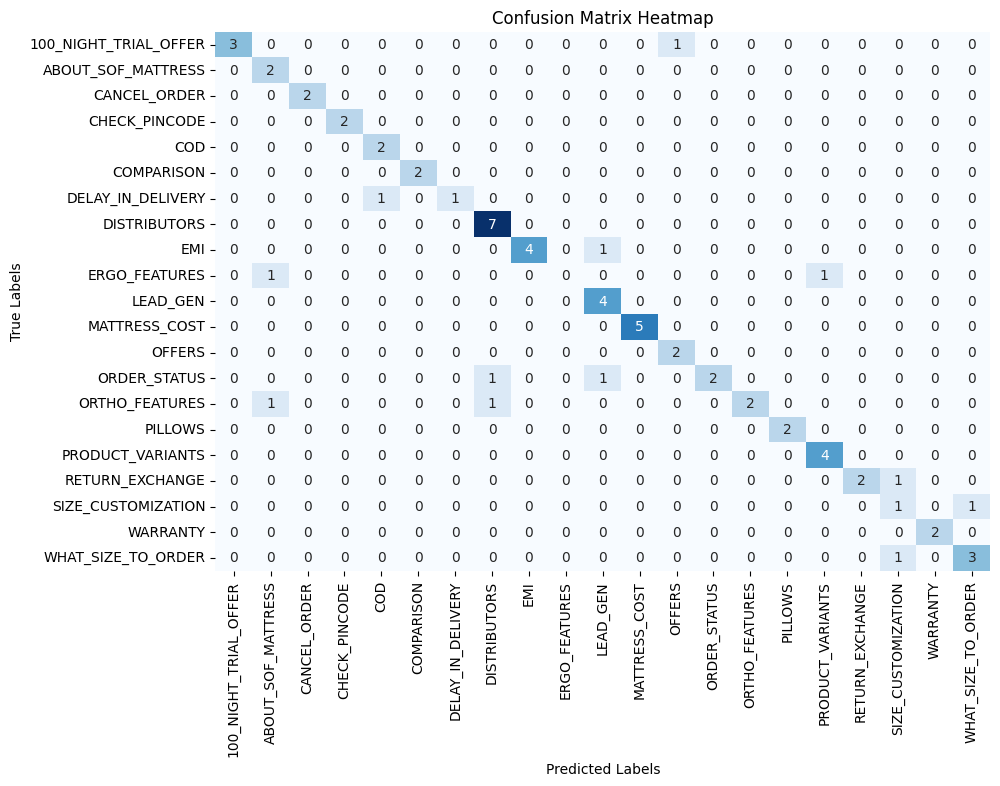

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_, cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Visual Analysis

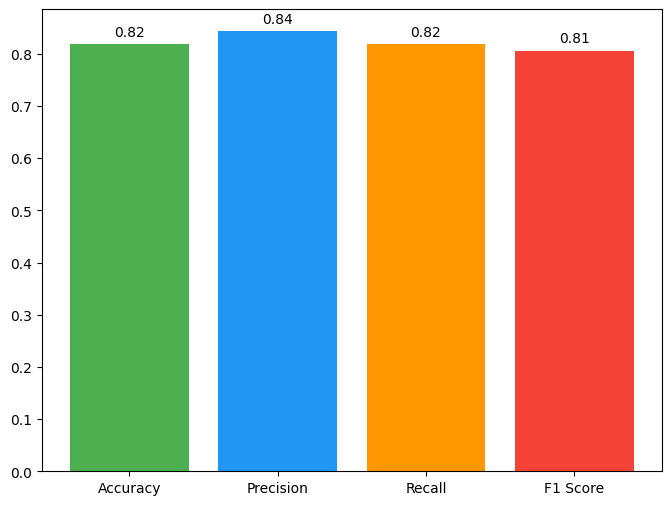

In [15]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['#4CAF50', '#2196F3', '#FF9800', '#F44336'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


# Normal test checking of the model with single intent

In [19]:
def preprocess_sentence(sentence):
  sentence = clean_text(sentence)       #from the function above to filter phrases
  sentence = vectorizer.transform([sentence])
  sentence = model.predict(sentence)
  return sentence

new_sen = "Any offers on pillows?"

preprocess_sentence = preprocess_sentence(new_sen)
print(preprocess_sentence)

['PILLOWS']


#Save the model


In [20]:
import joblib
from sklearn import *

clf = svm.SVC()
clf.fit(x_train_tfidf, y_train)
y_pred = clf.predict(x_test_tfidf)

print(y_pred)
joblib.dump(clf, "model.plk")
joblib.dump(vectorizer, "vectorizer.plk")

['EMI' 'DISTRIBUTORS' 'PRODUCT_VARIANTS' 'WARRANTY' 'LEAD_GEN'
 'PRODUCT_VARIANTS' 'LEAD_GEN' '100_NIGHT_TRIAL_OFFER'
 'WHAT_SIZE_TO_ORDER' 'CANCEL_ORDER' 'EMI' 'ABOUT_SOF_MATTRESS'
 '100_NIGHT_TRIAL_OFFER' 'DISTRIBUTORS' 'LEAD_GEN' 'DISTRIBUTORS'
 'DISTRIBUTORS' 'MATTRESS_COST' 'DISTRIBUTORS' 'DISTRIBUTORS'
 'PRODUCT_VARIANTS' 'COD' '100_NIGHT_TRIAL_OFFER' 'MATTRESS_COST'
 'DISTRIBUTORS' 'ORDER_STATUS' 'EMI' 'CHECK_PINCODE' 'MATTRESS_COST'
 'PRODUCT_VARIANTS' 'ORDER_STATUS' 'PILLOWS' 'PRODUCT_VARIANTS'
 'WHAT_SIZE_TO_ORDER' 'DISTRIBUTORS' 'PRODUCT_VARIANTS' 'ORTHO_FEATURES'
 'WHAT_SIZE_TO_ORDER' 'ABOUT_SOF_MATTRESS' 'DISTRIBUTORS' 'DISTRIBUTORS'
 'LEAD_GEN' 'COMPARISON' 'EMI' 'CANCEL_ORDER' 'CHECK_PINCODE' 'LEAD_GEN'
 'PRODUCT_VARIANTS' 'WARRANTY' 'DISTRIBUTORS' 'MATTRESS_COST'
 'WHAT_SIZE_TO_ORDER' 'DISTRIBUTORS' 'DISTRIBUTORS' 'DISTRIBUTORS'
 'WHAT_SIZE_TO_ORDER' 'DISTRIBUTORS' 'DISTRIBUTORS' 'DISTRIBUTORS'
 'DISTRIBUTORS' 'ABOUT_SOF_MATTRESS' 'OFFERS' 'MATTRESS_COST' 'LEAD_GEN'
 'D

['vectorizer.plk']

In [ ]:
"""import streamlit as st
import joblib

model = joblib.load("model.plk")
vectorizer = joblib.load("vectorizer.plk")

st.title("Intent Detection by TIFIN")
st.write("Enter your phrase:")

input = st.text_input("Enter here")

if input:
  input_vector = vectorizer.transform([user_input])
  prediction = model.predict(input_vector)
  st.write("Intent:", prediction)




  Use the terminal to run stream lit

  Step 1- pip install streamlit
  Step 2- streamlit run filename.py"""